IMPORTING THE LIBRABIES

In [132]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
import ipyleaflet
import matplotlib.pyplot as plt
import seaborn as sns

# Data Science
import numpy as np
import pandas as pd

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer

# Machine Learning
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [133]:
#importing the datasets

chennai_data = pd.read_csv("Chennai_1990_2022_Madras.csv")
mumbai_data = pd.read_csv("Mumbai_1990_2022_Santacruz.csv")
delhi_ncr_data = pd.read_csv("Delhi_NCR_1990_2022_Safdarjung.csv")
lucknow_data = pd.read_csv("Lucknow_1990_2022.csv")
rajasthan_data = pd.read_csv("Rajasthan_1990_2022_Jodhpur.csv")
bubaneshwar_data = pd.read_csv("weather_Bhubhneshwar_1990_2022.csv")
roukela_data = pd.read_csv("weather_Rourkela_2021_2022.csv")
bangalore_data = pd.read_csv("Bangalore_1990_2022_BangaloreCity.csv")




"chennai_data['City'] = 'Chennai'\nmumbai_data['City'] = 'Mumbai'\ndelhi_ncr_data['City'] = 'Delhi'\nlucknow_data['City'] = 'Lucknow'\nrajasthan_data['City'] = 'Rajasthan'\nbubaneshwar_data['City'] = 'Bubaneshwar'\nroukela_data['City'] = 'Roukela'\nbangalore_data['City'] = 'Bangalore"

ADDRESSING THE MISSING VALUES

In [134]:
chennai_data

,time,tavg,tmin,tmax,prcp
0,01-01-1990,25.2,22.8,28.4,0.5
1,02-01-1990,24.9,21.7,29.1,0.0
2,03-01-1990,25.6,21.4,29.8,0.0
3,04-01-1990,25.7,NaN,28.7,0.0
4,05-01-1990,25.5,20.7,28.4,0.0
...,...,...,...,...,...
11889,21-07-2022,28.4,24.5,32.8,21.1
11890,22-07-2022,27.8,24.6,32.2,22.1
11891,23-07-2022,27.4,24.7,32.6,18.6
11892,24-07-2022,27.8,25.0,33.3,9.1


In [135]:
chennai_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11867 non-null  float64
 2   tmin    8810 non-null   float64
 3   tmax    10875 non-null  float64
 4   prcp    7008 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB


In [136]:
chennai_data.isnull().sum()

time       0
tavg      27
tmin    3084
tmax    1019
prcp    4886
dtype: int64

In [137]:
# Replace 'NaN' values with forward fill
chennai_data['tmin'].fillna(method='ffill', inplace=True)
chennai_data['tmax'].fillna(method='ffill', inplace=True)


# Interpolate remaining missing values
chennai_data.interpolate(inplace=True)

# Print the updated DataFrame
print(chennai_data)

             time  tavg  tmin  tmax  prcp
0      01-01-1990  25.2  22.8  28.4   0.5
1      02-01-1990  24.9  21.7  29.1   0.0
2      03-01-1990  25.6  21.4  29.8   0.0
3      04-01-1990  25.7  21.4  28.7   0.0
4      05-01-1990  25.5  20.7  28.4   0.0
...           ...   ...   ...   ...   ...
11889  21-07-2022  28.4  24.5  32.8  21.1
11890  22-07-2022  27.8  24.6  32.2  22.1
11891  23-07-2022  27.4  24.7  32.6  18.6
11892  24-07-2022  27.8  25.0  33.3   9.1
11893  25-07-2022  28.1  25.4  32.6   2.9

[11894 rows x 5 columns]


OUTLIER DETECTION AND REMOVAL FOR ALL THE CITIES


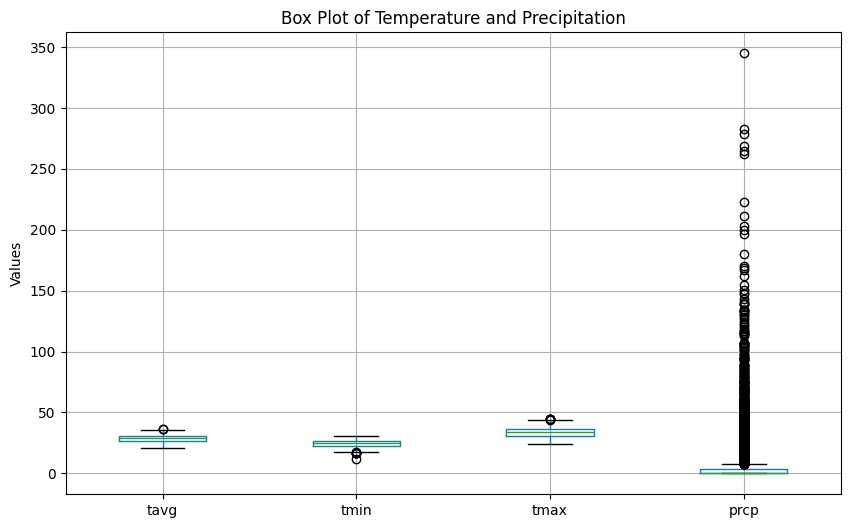

In [138]:
plt.figure(figsize=(10, 6))
chennai_data[['tavg', 'tmin', 'tmax', 'prcp']].boxplot()
plt.title('Box Plot of Temperature and Precipitation')
plt.ylabel('Values')
plt.show()


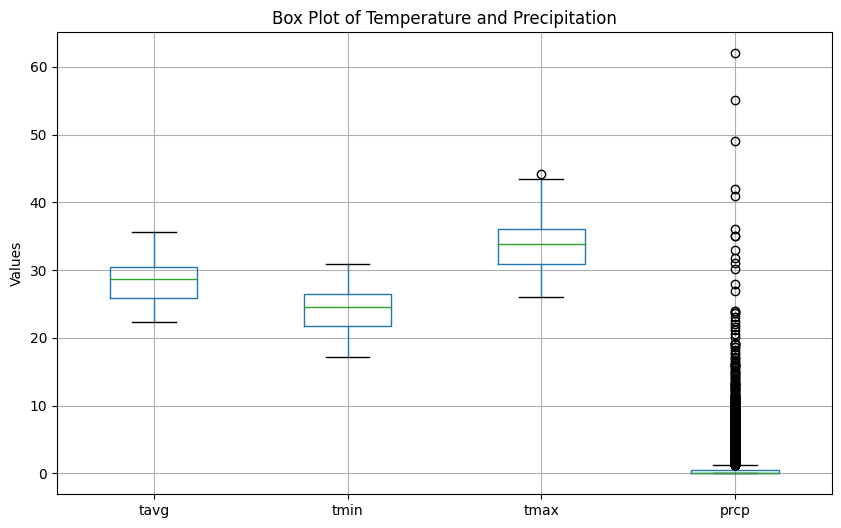

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'time' column to datetime format
chennai_data['time'] = pd.to_datetime(chennai_data['time'], format='%d-%m-%Y')

# Set the window size for the rolling operation (adjust as needed)
window_size = 5

# Calculate the rolling median for the numerical columns
rolling_median = chennai_data[['tavg', 'tmin', 'tmax', 'prcp']].rolling(window=window_size).median()

# Calculate the absolute difference between the actual values and the rolling median
deviation = abs(chennai_data[['tavg', 'tmin', 'tmax', 'prcp']] - rolling_median)

# Set a threshold for deviation (adjust as needed)
threshold = 1.0

# Find indices of outliers
outliers_indices = (deviation > threshold).any(axis=1)

# Remove outliers from the DataFrame
chennai_data_cleaned = chennai_data[~outliers_indices]

# Plot a box plot for the numerical columns
plt.figure(figsize=(10, 6))
chennai_data_cleaned[['tavg', 'tmin', 'tmax', 'prcp']].boxplot()
plt.title('Box Plot of Temperature and Precipitation')
plt.ylabel('Values')
plt.show()


In [140]:
chennai_data_cleaned.describe()

,tavg,tmin,tmax,prcp
count,4452.000000,4452.000000,4452.000000,4452.000000
mean,28.393351,24.236927,33.793351,1.178842
std,2.702627,2.802040,3.299670,3.490395
min,22.400000,17.200000,26.000000,0.000000
25%,25.900000,21.800000,30.900000,0.000000
50%,28.700000,24.500000,33.800000,0.000000
75%,30.500000,26.500000,36.100000,0.500000
max,35.600000,30.900000,44.200000,62.000000


In [141]:
mumbai_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11883 non-null  float64
 2   tmin    9440 non-null   float64
 3   tmax    9987 non-null   float64
 4   prcp    7213 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB


In [142]:
mumbai_data.isnull().sum()

time       0
tavg      11
tmin    2454
tmax    1907
prcp    4681
dtype: int64

In [143]:
# Replace 'NaN' values with forward fill
mumbai_data['tmin'].fillna(method='ffill', inplace=True)
mumbai_data['tmax'].fillna(method='ffill', inplace=True)


# Interpolate remaining missing values
mumbai_data.interpolate(inplace=True)

# Print the updated DataFrame
print(mumbai_data)

             time  tavg  tmin  tmax  prcp
0      01-01-1990  23.2  17.0   NaN   0.0
1      02-01-1990  22.2  16.5  29.9   0.0
2      03-01-1990  21.8  16.3  30.7   0.0
3      04-01-1990  25.4  17.9  31.8   0.0
4      05-01-1990  26.5  19.3  33.7   0.0
...           ...   ...   ...   ...   ...
11889  21-07-2022  27.6  25.6  30.5  10.9
11890  22-07-2022  28.3  26.0  30.5   3.0
11891  23-07-2022  28.2  25.8  31.3   5.1
11892  24-07-2022  28.1  25.6  30.4   7.1
11893  25-07-2022  28.3  25.1  30.2   7.1

[11894 rows x 5 columns]


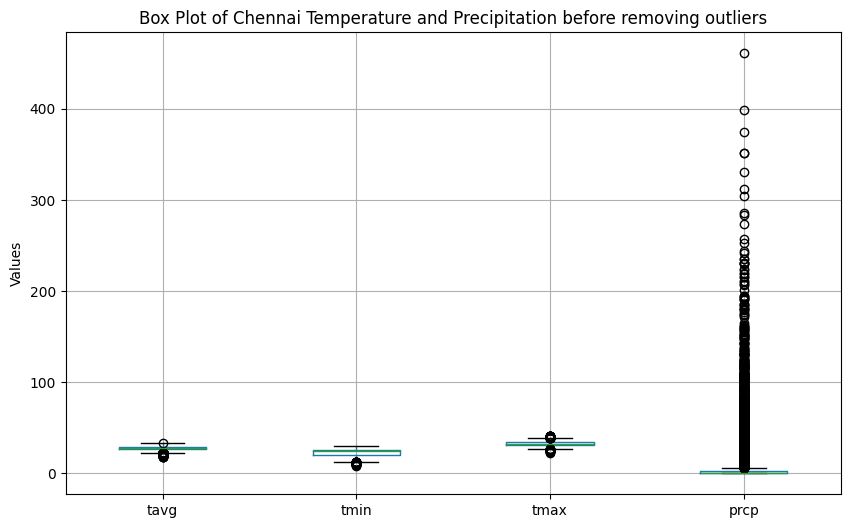

In [144]:
plt.figure(figsize=(10, 6))
mumbai_data[['tavg', 'tmin', 'tmax', 'prcp']].boxplot()
plt.title('Box Plot of Chennai Temperature and Precipitation before removing outliers')
plt.ylabel('Values')
plt.show()

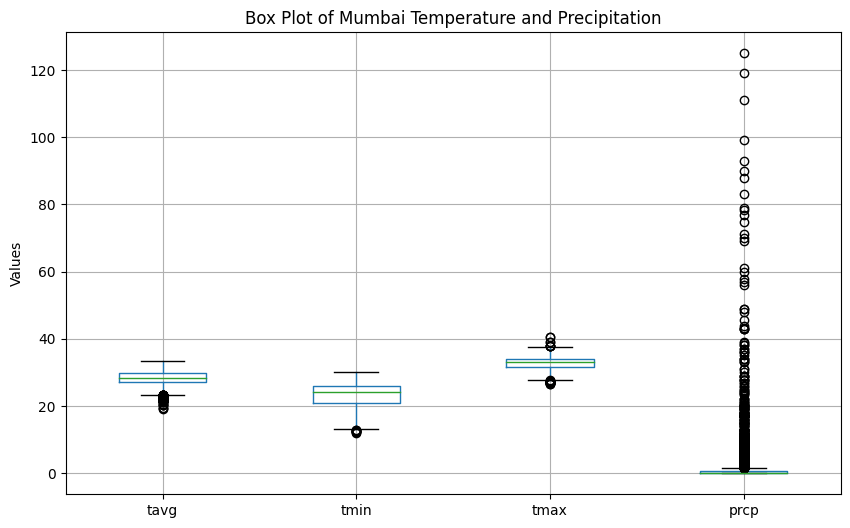

In [145]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the 'time' column to datetime format
mumbai_data['time'] = pd.to_datetime(mumbai_data['time'], format='%d-%m-%Y')

# Set the window size for the rolling operation (adjust as needed)
window_size = 5

# Calculate the rolling median for the numerical columns
rolling_median = mumbai_data[['tavg', 'tmin', 'tmax', 'prcp']].rolling(window=window_size).median()

# Calculate the absolute difference between the actual values and the rolling median
deviation = abs(mumbai_data[['tavg', 'tmin', 'tmax', 'prcp']] - rolling_median)

# Set a threshold for deviation (adjust as needed)
threshold = 1.0

# Find indices of outliers
outliers_indices = (deviation > threshold).any(axis=1)

# Remove outliers from the DataFrame
mumbai_data_cleaned = mumbai_data[~outliers_indices]

# Plot a box plot for the numerical columns
plt.figure(figsize=(10, 6))
mumbai_data_cleaned[['tavg', 'tmin', 'tmax', 'prcp']].boxplot()
plt.title('Box Plot of Mumbai Temperature and Precipitation')
plt.ylabel('Values')
plt.show()

In [146]:
mumbai_data_cleaned.describe()

,tavg,tmin,tmax,prcp
count,4294.000000,4294.000000,4293.000000,4294.000000
mean,28.248037,23.393433,32.778686,1.830004
std,2.112690,3.666499,1.816332,7.191752
min,19.100000,11.900000,26.500000,0.000000
25%,27.200000,20.800000,31.500000,0.000000
50%,28.500000,24.300000,33.000000,0.000000
75%,29.800000,26.000000,34.000000,0.654371
max,33.300000,30.000000,40.500000,125.000000


In [147]:
delhi_ncr_data.isnull().sum()

time       0
tavg      94
tmin    1536
tmax     533
prcp    6140
dtype: int64

In [148]:

# Replace 'NaN' values with forward fill
delhi_ncr_data['tmin'].fillna(method='ffill', inplace=True)
delhi_ncr_data['tmax'].fillna(method='ffill', inplace=True)


# Interpolate remaining missing values
delhi_ncr_data.interpolate(inplace=True)

# Print the updated DataFrame
print(delhi_ncr_data)

             time  tavg  tmin  tmax  prcp
0      01-01-1990   9.4   6.0  15.1   0.0
1      02-01-1990   9.3   5.2  14.2   0.0
2      03-01-1990   9.0   6.5  13.6   0.0
3      04-01-1990  10.7   6.0  17.5   0.0
4      05-01-1990  12.6   7.3  20.8   0.0
...           ...   ...   ...   ...   ...
11889  21-07-2022  28.6  26.8  30.6  21.2
11890  22-07-2022  29.3  27.0  32.9   0.3
11891  23-07-2022  30.1  25.5  34.9   8.9
11892  24-07-2022  30.6  27.1  35.7   0.0
11893  25-07-2022  30.7  26.8  35.7   0.0

[11894 rows x 5 columns]


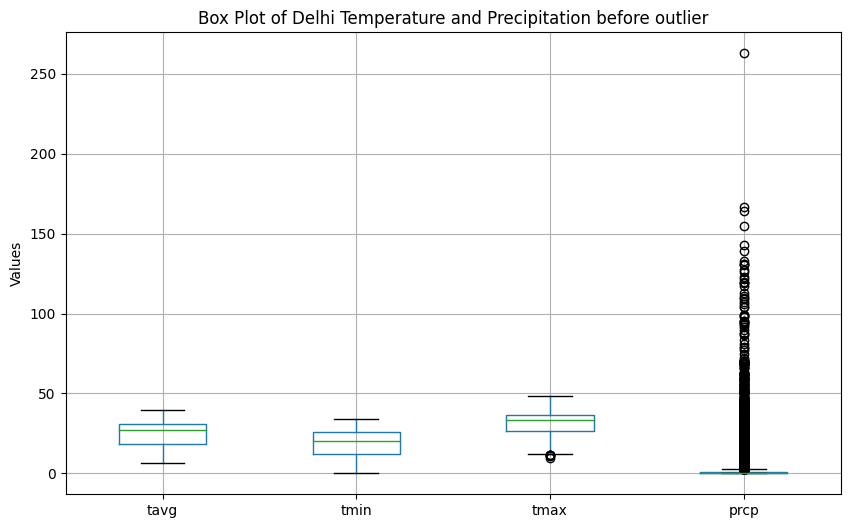

In [149]:
plt.figure(figsize=(10, 6))
delhi_ncr_data[['tavg', 'tmin', 'tmax', 'prcp']].boxplot()
plt.title('Box Plot of Delhi Temperature and Precipitation before outlier')
plt.ylabel('Values')
plt.show()

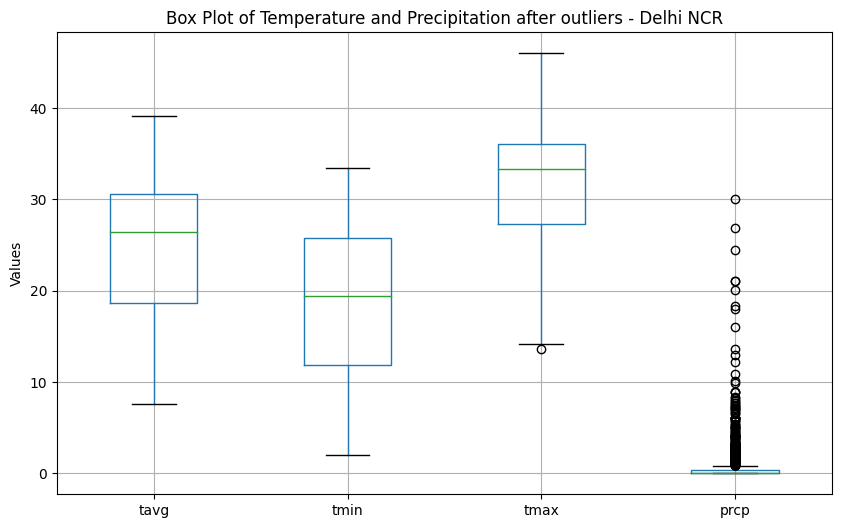

,tavg,tmin,tmax,prcp
count,2800.000000,2800.000000,2800.000000,2800.000000
mean,24.801576,18.653321,31.870821,0.499770
std,7.078487,7.674981,6.284583,1.676755
min,7.600000,2.000000,13.600000,0.000000
25%,18.700000,11.900000,27.300000,0.000000
50%,26.400000,19.400000,33.300000,0.000000
75%,30.600000,25.800000,36.100000,0.341964
max,39.100000,33.400000,46.000000,30.000000


In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'time' column to datetime format
delhi_ncr_data['time'] = pd.to_datetime(delhi_ncr_data['time'], format='%d-%m-%Y')

# Set the window size for the rolling operation (adjust as needed)
window_size = 5

# Calculate the rolling median for the numerical columns
rolling_median = delhi_ncr_data[['tavg', 'tmin', 'tmax', 'prcp']].rolling(window=window_size).median()

# Calculate the absolute difference between the actual values and the rolling median
deviation = abs(delhi_ncr_data[['tavg', 'tmin', 'tmax', 'prcp']] - rolling_median)

# Set a threshold for deviation (adjust as needed)
threshold = 1.0

# Find indices of outliers
outliers_indices = (deviation > threshold).any(axis=1)

# Remove outliers from the DataFrame
delhi_ncr_data_cleaned = delhi_ncr_data[~outliers_indices]

# Plot a box plot for the numerical columns
plt.figure(figsize=(10, 6))
delhi_ncr_data_cleaned[['tavg', 'tmin', 'tmax', 'prcp']].boxplot()
plt.title('Box Plot of Temperature and Precipitation after outliers - Delhi NCR')
plt.ylabel('Values')
plt.show()

delhi_ncr_data_cleaned.describe()


In [151]:
lucknow_data.isnull().sum()

time       0
tavg     138
tmin    3515
tmax    1553
prcp    6152
dtype: int64

In [152]:
# Replace 'NaN' values with forward fill
lucknow_data['tmin'].fillna(method='ffill', inplace=True)
lucknow_data['tmax'].fillna(method='ffill', inplace=True)


# Interpolate remaining missing values
lucknow_data.interpolate(inplace=True)

# Print the updated DataFrame
print(lucknow_data)

             time  tavg  tmin  tmax  prcp
0      01-01-1990   7.2   NaN  18.1   0.0
1      02-01-1990  10.5   NaN  17.2   0.0
2      03-01-1990  10.2   1.8  18.6   0.0
3      04-01-1990   9.1   1.8  19.3   0.0
4      05-01-1990  13.5   1.8  23.8   0.0
...           ...   ...   ...   ...   ...
11889  21-07-2022  27.4  25.1  33.1  27.3
11890  22-07-2022  28.1  26.1  31.1  16.0
11891  23-07-2022  30.3  26.2  34.7  11.9
11892  24-07-2022  30.0  28.1  34.7   2.0
11893  25-07-2022  27.1  24.1  34.3   0.5

[11894 rows x 5 columns]


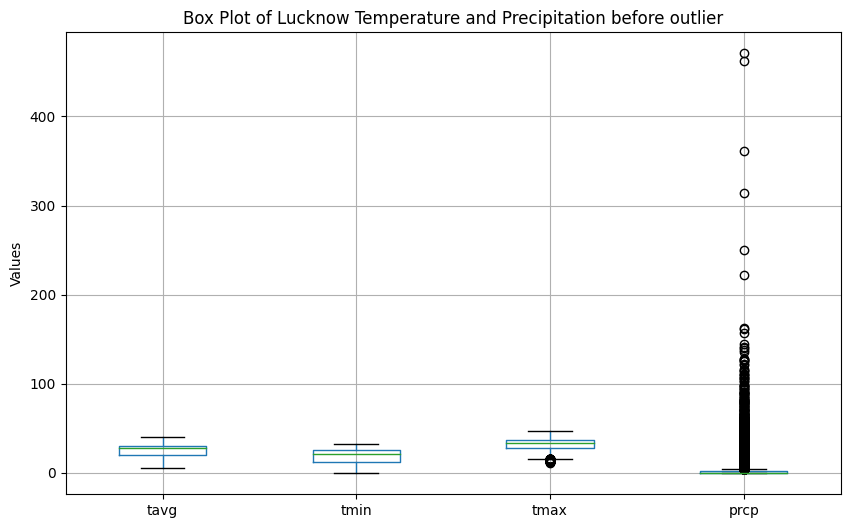

In [153]:
plt.figure(figsize=(10, 6))
lucknow_data[['tavg', 'tmin', 'tmax', 'prcp']].boxplot()
plt.title('Box Plot of Lucknow Temperature and Precipitation before outlier')
plt.ylabel('Values')
plt.show()

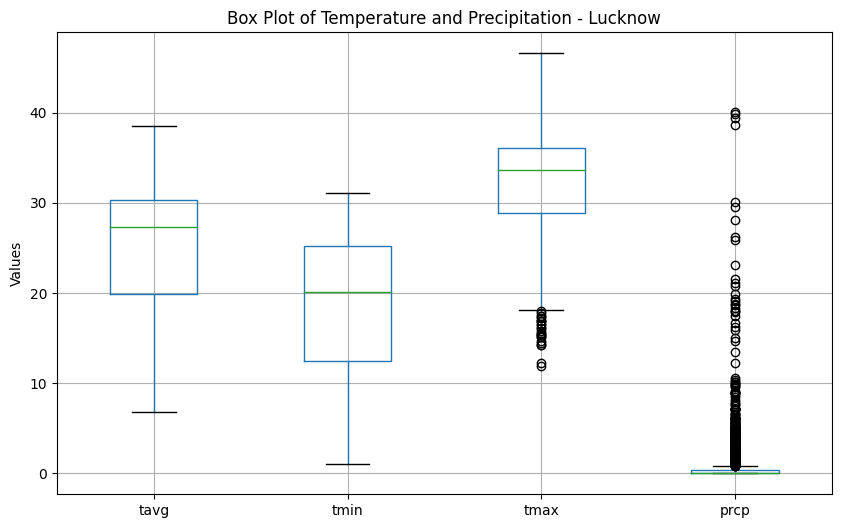

,tavg,tmin,tmax,prcp
count,3069.000000,3067.000000,3069.000000,3069.000000
mean,25.367130,18.788393,32.840795,0.737702
std,6.402049,7.118530,5.654345,2.651183
min,6.800000,1.000000,11.900000,0.000000
25%,19.900000,12.500000,28.900000,0.000000
50%,27.300000,20.100000,33.700000,0.000000
75%,30.300000,25.250000,36.100000,0.333333
max,38.500000,31.100000,46.600000,40.100000


In [154]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the 'time' column to datetime format
lucknow_data['time'] = pd.to_datetime(lucknow_data['time'], format='%d-%m-%Y')

# Set the window size for the rolling operation (adjust as needed)
window_size = 5

# Calculate the rolling median for the numerical columns
rolling_median = lucknow_data[['tavg', 'tmin', 'tmax', 'prcp']].rolling(window=window_size).median()

# Calculate the absolute difference between the actual values and the rolling median
deviation = abs(lucknow_data[['tavg', 'tmin', 'tmax', 'prcp']] - rolling_median)

# Set a threshold for deviation (adjust as needed)
threshold = 1.0

# Find indices of outliers
outliers_indices = (deviation > threshold).any(axis=1)

# Remove outliers from the DataFrame
lucknow_data_cleaned = lucknow_data[~outliers_indices]

# Plot a box plot for the numerical columns
plt.figure(figsize=(10, 6))
lucknow_data_cleaned[['tavg', 'tmin', 'tmax', 'prcp']].boxplot()
plt.title('Box Plot of Temperature and Precipitation - Lucknow')
plt.ylabel('Values')
plt.show()

lucknow_data_cleaned.describe()


In [155]:
rajasthan_data.isnull().sum()

time       0
tavg      70
tmin    1389
tmax     629
prcp    4620
dtype: int64

In [156]:
# Replace 'NaN' values with forward fill
rajasthan_data['tmin'].fillna(method='ffill', inplace=True)
rajasthan_data['tmax'].fillna(method='ffill', inplace=True)


# Interpolate remaining missing values
rajasthan_data.interpolate(inplace=True)

# Print the updated DataFrame
print(rajasthan_data)

             time  tavg  tmin  tmax  prcp
0      01-01-1990  22.9  19.1  28.4   NaN
1      02-01-1990  21.7  19.1  26.5   0.0
2      03-01-1990  21.0  16.4  26.5   0.0
3      04-01-1990  20.8  16.4  27.4   0.0
4      05-01-1990  20.4  14.2  26.1   0.0
...           ...   ...   ...   ...   ...
11889  21-07-2022  23.7  20.5  30.8  82.5
11890  22-07-2022  23.2  21.1  27.9   0.0
11891  23-07-2022  23.1  20.9  26.7   0.0
11892  24-07-2022  22.8  20.0  26.7   0.3
11893  25-07-2022  24.1  20.2  28.5   0.5

[11894 rows x 5 columns]


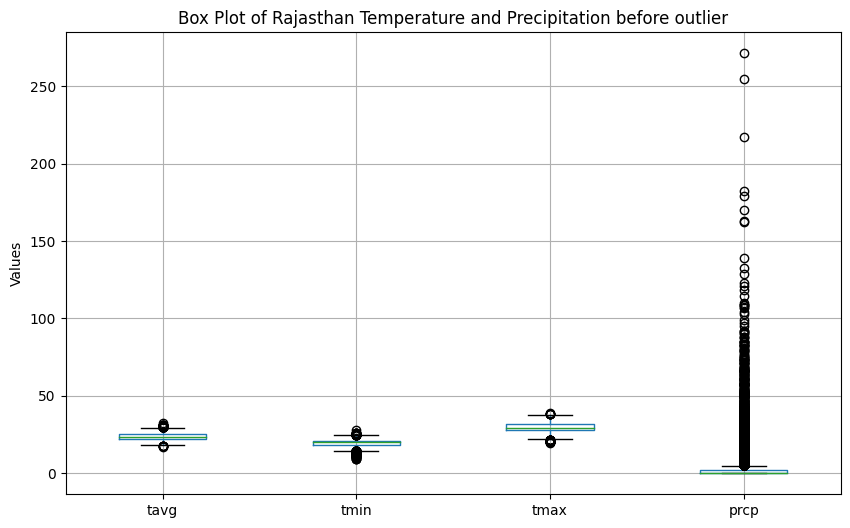

In [157]:
plt.figure(figsize=(10, 6))
rajasthan_data[['tavg', 'tmin', 'tmax', 'prcp']].boxplot()
plt.title('Box Plot of Rajasthan Temperature and Precipitation before outlier')
plt.ylabel('Values')
plt.show()

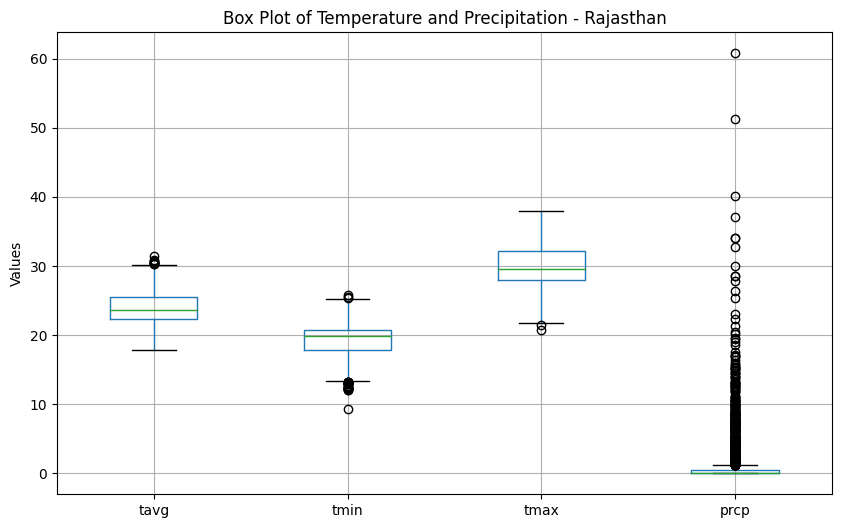

,tavg,tmin,tmax,prcp
count,4255.000000,4255.000000,4255.000000,4254.000000
mean,24.019315,19.342327,30.193349,0.861495
std,2.364663,2.397592,2.846263,2.968792
min,17.800000,9.300000,20.700000,0.000000
25%,22.400000,17.800000,28.000000,0.000000
50%,23.700000,19.800000,29.600000,0.000000
75%,25.500000,20.800000,32.200000,0.473445
max,31.500000,25.800000,38.000000,60.785714


In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'time' column to datetime format
rajasthan_data['time'] = pd.to_datetime(rajasthan_data['time'], format='%d-%m-%Y')

# Set the window size for the rolling operation (adjust as needed)
window_size = 5

# Calculate the rolling median for the numerical columns
rolling_median = rajasthan_data[['tavg', 'tmin', 'tmax', 'prcp']].rolling(window=window_size).median()

# Calculate the absolute difference between the actual values and the rolling median
deviation = abs(rajasthan_data[['tavg', 'tmin', 'tmax', 'prcp']] - rolling_median)

# Set a threshold for deviation (adjust as needed)
threshold = 1.0

# Find indices of outliers
outliers_indices = (deviation > threshold).any(axis=1)

# Remove outliers from the DataFrame
rajasthan_data_cleaned = rajasthan_data[~outliers_indices]

# Plot a box plot for the numerical columns
plt.figure(figsize=(10, 6))
rajasthan_data_cleaned[['tavg', 'tmin', 'tmax', 'prcp']].boxplot()
plt.title('Box Plot of Temperature and Precipitation - Rajasthan')
plt.ylabel('Values')
plt.show()

rajasthan_data_cleaned.describe()


In [159]:
bubaneshwar_data.isnull().sum()

time       0
tavg      78
tmin    2090
tmax     891
prcp    5097
dtype: int64

In [160]:
# Replace 'NaN' values with forward fill
bubaneshwar_data['tmin'].fillna(method='ffill', inplace=True)
bubaneshwar_data['tmax'].fillna(method='ffill', inplace=True)


# Interpolate remaining missing values
bubaneshwar_data.interpolate(inplace=True)

# Print the updated DataFrame
print(bubaneshwar_data)

             time  tavg  tmin  tmax  prcp
0      01-01-1990  20.1   NaN  28.0   0.0
1      02-01-1990  20.7  16.4  28.0   0.0
2      03-01-1990  20.7  16.0  27.4   0.0
3      04-01-1990  18.8  16.0  28.0   0.0
4      05-01-1990  19.8  11.0  28.2   0.0
...           ...   ...   ...   ...   ...
11930  31-08-2022  29.2  26.3  33.0   9.0
11931  01-09-2022  29.6  27.0  33.0   2.1
11932  02-09-2022  29.7  26.3  33.0   3.3
11933  03-09-2022  29.2  26.1  34.0   9.7
11934  04-09-2022  27.6  25.9  31.6  12.8

[11935 rows x 5 columns]


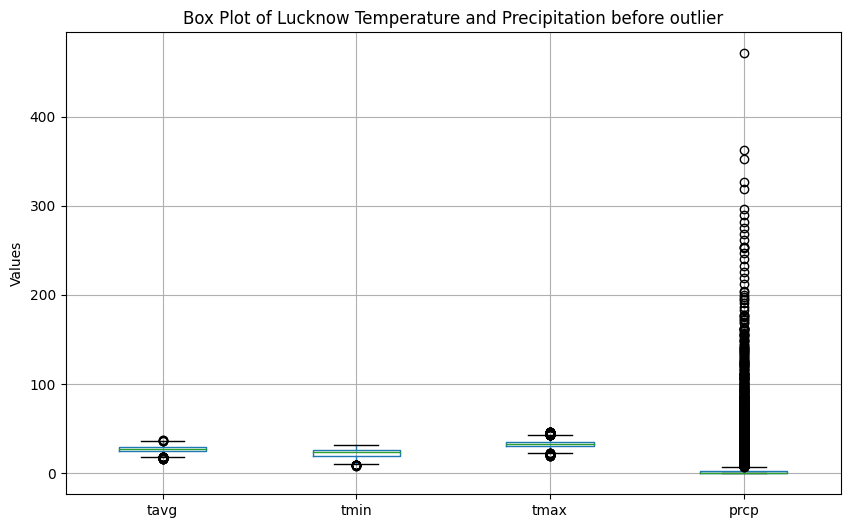

In [161]:
plt.figure(figsize=(10, 6))
bubaneshwar_data[['tavg', 'tmin', 'tmax', 'prcp']].boxplot()
plt.title('Box Plot of Lucknow Temperature and Precipitation before outlier')
plt.ylabel('Values')
plt.show()

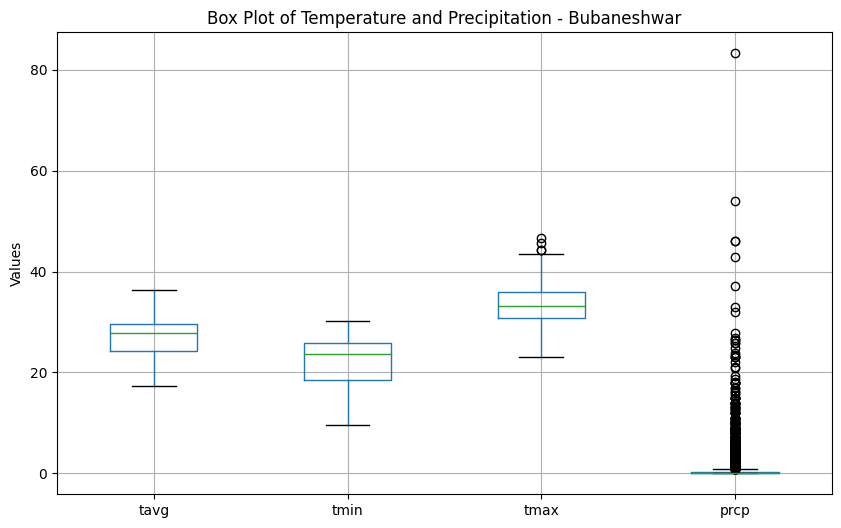

,tavg,tmin,tmax,prcp
count,3196.000000,3195.000000,3196.000000,3196.000000
mean,27.064114,22.176150,33.415300,1.007986
std,3.651219,4.637866,3.464901,3.670770
min,17.400000,9.500000,23.000000,0.000000
25%,24.275000,18.500000,30.800000,0.000000
50%,27.900000,23.700000,33.100000,0.000000
75%,29.700000,25.800000,36.000000,0.333333
max,36.300000,30.300000,46.600000,83.300000


In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'time' column to datetime format
bubaneshwar_data['time'] = pd.to_datetime(bubaneshwar_data['time'], format='%d-%m-%Y')

# Set the window size for the rolling operation (adjust as needed)
window_size = 5

# Calculate the rolling median for the numerical columns
rolling_median = bubaneshwar_data[['tavg', 'tmin', 'tmax', 'prcp']].rolling(window=window_size).median()

# Calculate the absolute difference between the actual values and the rolling median
deviation = abs(bubaneshwar_data[['tavg', 'tmin', 'tmax', 'prcp']] - rolling_median)

# Set a threshold for deviation (adjust as needed)
threshold = 1.0

# Find indices of outliers
outliers_indices = (deviation > threshold).any(axis=1)

# Remove outliers from the DataFrame
bubaneshwar_data_cleaned = bubaneshwar_data[~outliers_indices]

# Plot a box plot for the numerical columns
plt.figure(figsize=(10, 6))
bubaneshwar_data_cleaned[['tavg', 'tmin', 'tmax', 'prcp']].boxplot()
plt.title('Box Plot of Temperature and Precipitation - Bubaneshwar')
plt.ylabel('Values')
plt.show()

bubaneshwar_data_cleaned.describe()


In [163]:
roukela_data.isnull().sum()

time    0
tavg    2
tmin    2
tmax    2
prcp    3
dtype: int64

In [164]:
# Replace 'NaN' values with forward fill
roukela_data['tmin'].fillna(method='ffill', inplace=True)
roukela_data['tmax'].fillna(method='ffill', inplace=True)


# Interpolate remaining missing values
roukela_data.interpolate(inplace=True)

# Print the updated DataFrame
print(roukela_data)

           time  tavg  tmin  tmax  prcp
0    06-07-2021  29.3  26.2  32.6   NaN
1    07-07-2021  29.7  27.3  33.4  11.1
2    08-07-2021  27.4  25.8  29.7  66.9
3    09-07-2021  28.5  26.1  32.1  11.4
4    10-07-2021  29.0  26.2  32.6   2.7
..          ...   ...   ...   ...   ...
421  31-08-2022  29.0  26.6  33.5   2.0
422  01-09-2022  29.1  25.7  33.2  11.5
423  02-09-2022  29.4  26.4  33.7   1.5
424  03-09-2022  28.7  26.6  32.6   8.0
425  04-09-2022  28.2  25.9  31.8  17.7

[426 rows x 5 columns]


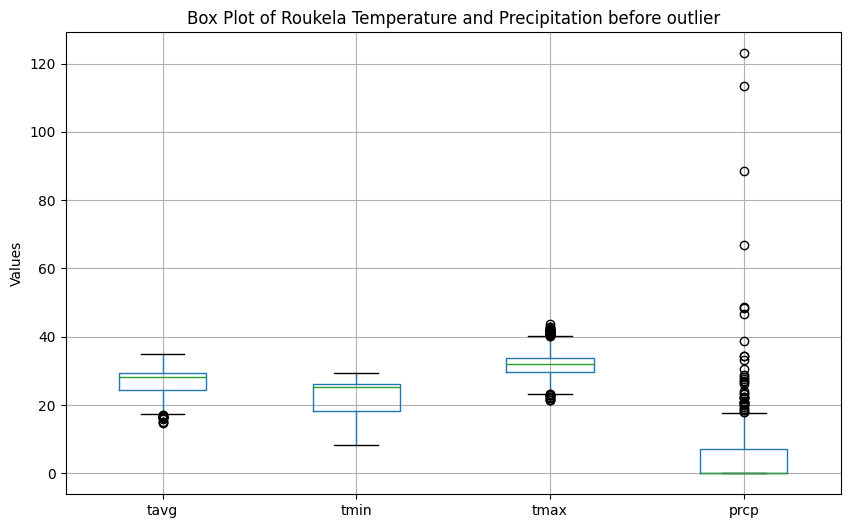

In [165]:
plt.figure(figsize=(10, 6))
roukela_data[['tavg', 'tmin', 'tmax', 'prcp']].boxplot()
plt.title('Box Plot of Roukela Temperature and Precipitation before outlier')
plt.ylabel('Values')
plt.show()

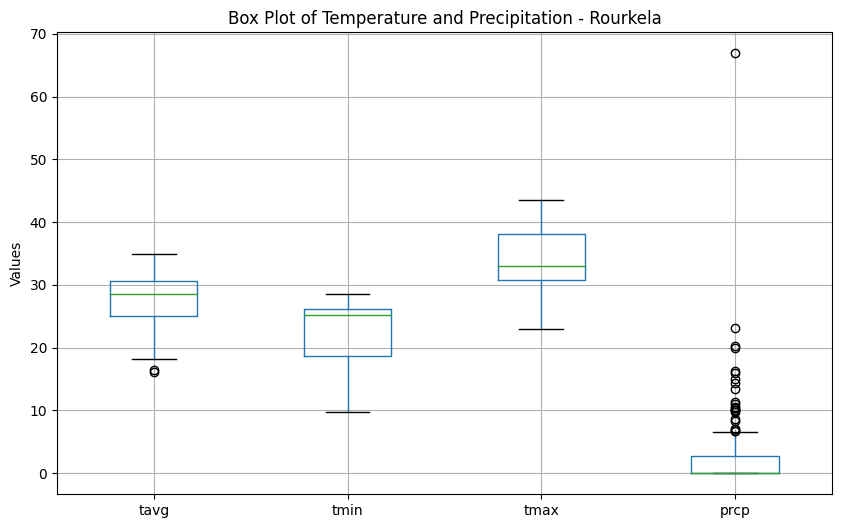

,tavg,tmin,tmax,prcp
count,139.000000,139.000000,139.000000,138.000000
mean,27.789928,22.808633,33.762590,2.981159
std,4.197693,4.489303,4.722875,7.283764
min,16.200000,9.700000,23.000000,0.000000
25%,25.100000,18.650000,30.800000,0.000000
50%,28.500000,25.200000,33.000000,0.000000
75%,30.650000,26.100000,38.150000,2.675000
max,35.000000,28.500000,43.600000,66.900000


In [166]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'roukela_data'
# Convert the 'time' column to datetime format
roukela_data['time'] = pd.to_datetime(roukela_data['time'], format='%d-%m-%Y')

# Set the window size for the rolling operation (adjust as needed)
window_size = 5

# Calculate the rolling median for the numerical columns
rolling_median = roukela_data[['tavg', 'tmin', 'tmax', 'prcp']].rolling(window=window_size).median()

# Calculate the absolute difference between the actual values and the rolling median
deviation = abs(roukela_data[['tavg', 'tmin', 'tmax', 'prcp']] - rolling_median)

# Set a threshold for deviation (adjust as needed)
threshold = 1.0

# Find indices of outliers
outliers_indices = (deviation > threshold).any(axis=1)

# Remove outliers from the DataFrame
roukela_data_cleaned = roukela_data[~outliers_indices]

# Plot a box plot for the numerical columns
plt.figure(figsize=(10, 6))
roukela_data_cleaned[['tavg', 'tmin', 'tmax', 'prcp']].boxplot()
plt.title('Box Plot of Temperature and Precipitation - Rourkela')
plt.ylabel('Values')
plt.show()

roukela_data_cleaned.describe()


In [167]:
bangalore_data.isnull().sum()

time       0
tavg      70
tmin    1389
tmax     629
prcp    4620
dtype: int64

In [168]:
# Replace 'NaN' values with forward fill
bangalore_data['tmin'].fillna(method='ffill', inplace=True)
bangalore_data['tmax'].fillna(method='ffill', inplace=True)


# Interpolate remaining missing values
bangalore_data.interpolate(inplace=True)

# Print the updated DataFrame
print(bangalore_data)

             time  tavg  tmin  tmax  prcp
0      01-01-1990  22.9  19.1  28.4   NaN
1      02-01-1990  21.7  19.1  26.5   0.0
2      03-01-1990  21.0  16.4  26.5   0.0
3      04-01-1990  20.8  16.4  27.4   0.0
4      05-01-1990  20.4  14.2  26.1   0.0
...           ...   ...   ...   ...   ...
11889  21-07-2022  23.7  20.5  30.8  82.5
11890  22-07-2022  23.2  21.1  27.9   0.0
11891  23-07-2022  23.1  20.9  26.7   0.0
11892  24-07-2022  22.8  20.0  26.7   0.3
11893  25-07-2022  24.1  20.2  28.5   0.5

[11894 rows x 5 columns]


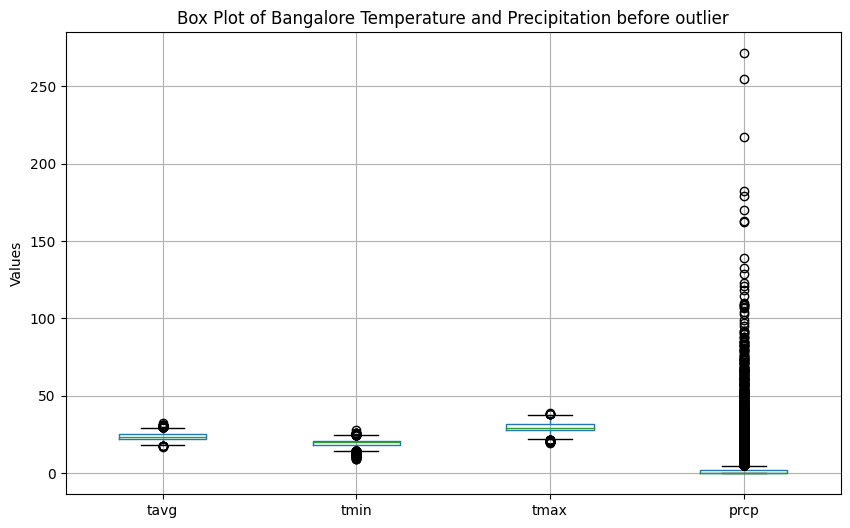

In [169]:
plt.figure(figsize=(10, 6))
bangalore_data[['tavg', 'tmin', 'tmax', 'prcp']].boxplot()
plt.title('Box Plot of Bangalore Temperature and Precipitation before outlier')
plt.ylabel('Values')
plt.show()

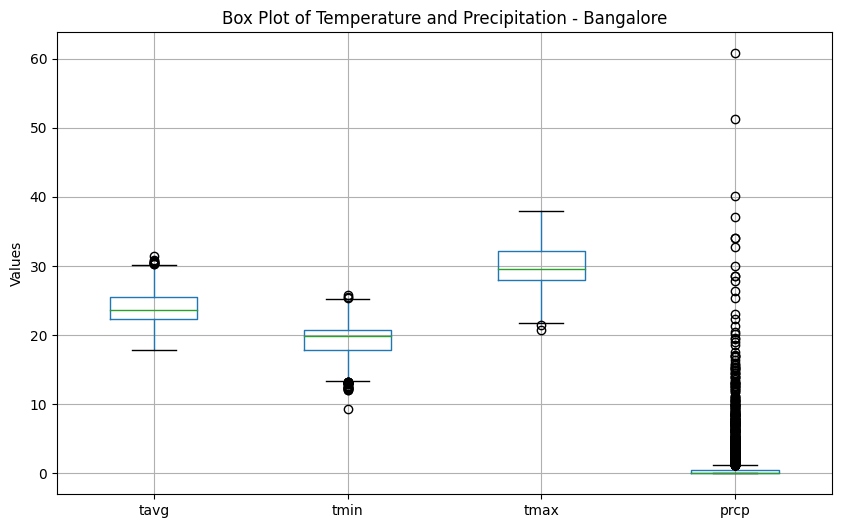

,tavg,tmin,tmax,prcp
count,4255.000000,4255.000000,4255.000000,4254.000000
mean,24.019315,19.342327,30.193349,0.861495
std,2.364663,2.397592,2.846263,2.968792
min,17.800000,9.300000,20.700000,0.000000
25%,22.400000,17.800000,28.000000,0.000000
50%,23.700000,19.800000,29.600000,0.000000
75%,25.500000,20.800000,32.200000,0.473445
max,31.500000,25.800000,38.000000,60.785714


In [170]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the 'time' column to datetime format
bangalore_data['time'] = pd.to_datetime(bangalore_data['time'], format='%d-%m-%Y')

# Set the window size for the rolling operation (adjust as needed)
window_size = 5

# Calculate the rolling median for the numerical columns
rolling_median = bangalore_data[['tavg', 'tmin', 'tmax', 'prcp']].rolling(window=window_size).median()

# Calculate the absolute difference between the actual values and the rolling median
deviation = abs(bangalore_data[['tavg', 'tmin', 'tmax', 'prcp']] - rolling_median)

# Set a threshold for deviation (adjust as needed)
threshold = 1.0

# Find indices of outliers
outliers_indices = (deviation > threshold).any(axis=1)

# Remove outliers from the DataFrame
bangalore_data_cleaned = bangalore_data[~outliers_indices]

# Plot a box plot for the numerical columns
plt.figure(figsize=(10, 6))
bangalore_data_cleaned[['tavg', 'tmin', 'tmax', 'prcp']].boxplot()
plt.title('Box Plot of Temperature and Precipitation - Bangalore')
plt.ylabel('Values')
plt.show()

bangalore_data_cleaned.describe()


In [171]:
chennai_data_cleaned

,time,tavg,tmin,tmax,prcp
0,1990-01-01,25.2,22.8,28.4,0.5
1,1990-01-02,24.9,21.7,29.1,0.0
2,1990-01-03,25.6,21.4,29.8,0.0
3,1990-01-04,25.7,21.4,28.7,0.0
4,1990-01-05,25.5,20.7,28.4,0.0
...,...,...,...,...,...
11877,2022-07-09,28.2,25.9,31.0,1.8
11882,2022-07-14,31.3,27.8,36.0,0.0
11883,2022-07-15,30.7,27.3,37.0,0.4
11887,2022-07-19,28.9,25.9,33.7,3.1


Q2) Find deviations in 2021 and 2022 as compared to the historical average or
patterns.

In [172]:
chennai_data_cleaned['City'] = 'Chennai'
mumbai_data_cleaned['City'] = 'Mumbai'
delhi_ncr_data_cleaned['City'] = 'Delhi'
lucknow_data_cleaned['City'] = 'Lucknow'
rajasthan_data_cleaned['City'] = 'Rajasthan'
bubaneshwar_data_cleaned['City'] = 'Bubaneshwar'
roukela_data_cleaned['City'] = 'Roukela'
bangalore_data_cleaned['City'] = 'Bangalore'

In [173]:
frames=[chennai_data_cleaned, mumbai_data_cleaned, delhi_ncr_data_cleaned, lucknow_data_cleaned, rajasthan_data_cleaned, bubaneshwar_data_cleaned, roukela_data_cleaned,bangalore_data_cleaned]
cities = pd.concat(frames)

In [174]:
cities

,time,tavg,tmin,tmax,prcp,City
0,1990-01-01,25.2,22.8,28.4,0.5,Chennai
1,1990-01-02,24.9,21.7,29.1,0.0,Chennai
2,1990-01-03,25.6,21.4,29.8,0.0,Chennai
3,1990-01-04,25.7,21.4,28.7,0.0,Chennai
4,1990-01-05,25.5,20.7,28.4,0.0,Chennai
...,...,...,...,...,...,...
11865,2022-06-27,23.7,20.1,28.3,0.0,Bangalore
11871,2022-07-03,23.5,21.1,28.5,0.0,Bangalore
11874,2022-07-06,22.1,20.6,26.5,0.3,Bangalore
11883,2022-07-15,22.3,19.5,25.6,2.3,Bangalore


In [175]:
# Convert the 'time' column to a datetime object
cities['time'] = pd.to_datetime(cities['time'])

# Extract year information
cities['year'] = cities['time'].dt.year
cities


,time,tavg,tmin,tmax,prcp,City,year
0,1990-01-01,25.2,22.8,28.4,0.5,Chennai,1990
1,1990-01-02,24.9,21.7,29.1,0.0,Chennai,1990
2,1990-01-03,25.6,21.4,29.8,0.0,Chennai,1990
3,1990-01-04,25.7,21.4,28.7,0.0,Chennai,1990
4,1990-01-05,25.5,20.7,28.4,0.0,Chennai,1990
...,...,...,...,...,...,...,...
11865,2022-06-27,23.7,20.1,28.3,0.0,Bangalore,2022
11871,2022-07-03,23.5,21.1,28.5,0.0,Bangalore,2022
11874,2022-07-06,22.1,20.6,26.5,0.3,Bangalore,2022
11883,2022-07-15,22.3,19.5,25.6,2.3,Bangalore,2022


In [176]:
city_temp_by_year = pd.DataFrame(cities.groupby(['City', 'year'])['tavg'].mean())
city_temp_by_year = city_temp_by_year.reset_index()
city_temp_by_year

,City,year,tavg
0,Bangalore,1990,23.433457
1,Bangalore,1991,23.701282
2,Bangalore,1992,23.479375
3,Bangalore,1993,24.047328
4,Bangalore,1994,23.541045
...,...,...,...
228,Rajasthan,2020,24.404310
229,Rajasthan,2021,24.065138
230,Rajasthan,2022,24.365823
231,Roukela,2021,25.689091


In [177]:
import plotly.express as px
fig = px.line(city_temp_by_year, x="year", y="tavg", color='City')
fig.show()

In [178]:
city_prcp_by_year = pd.DataFrame(cities.groupby(['City', 'year'])['prcp'].mean())
city_prcp_by_year = city_prcp_by_year.reset_index()
city_prcp_by_year

,City,year,prcp
0,Bangalore,1990,0.574023
1,Bangalore,1991,0.697721
2,Bangalore,1992,0.213194
3,Bangalore,1993,0.140267
4,Bangalore,1994,0.524876
...,...,...,...
228,Rajasthan,2020,0.357133
229,Rajasthan,2021,0.676147
230,Rajasthan,2022,0.624051
231,Roukela,2021,4.616667


In [179]:
import plotly.express as px
fig = px.line(city_prcp_by_year, x="year", y="prcp", color='City')
fig.show()

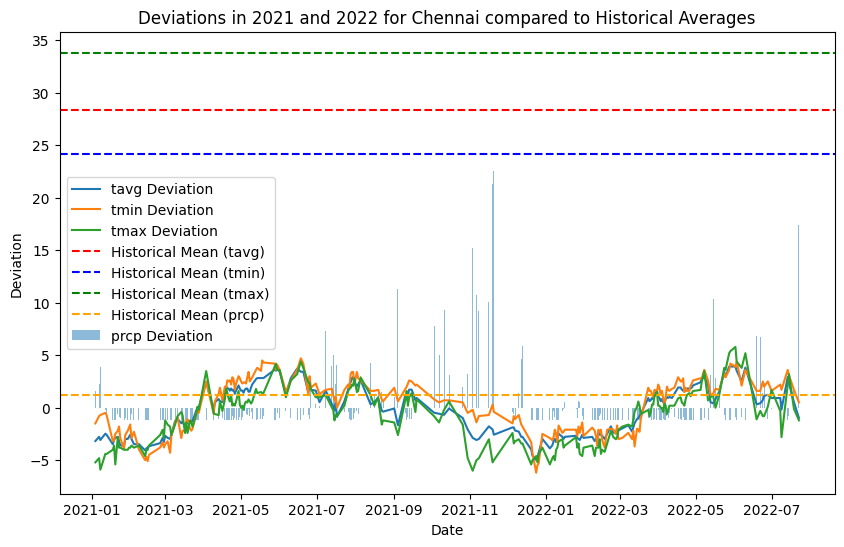

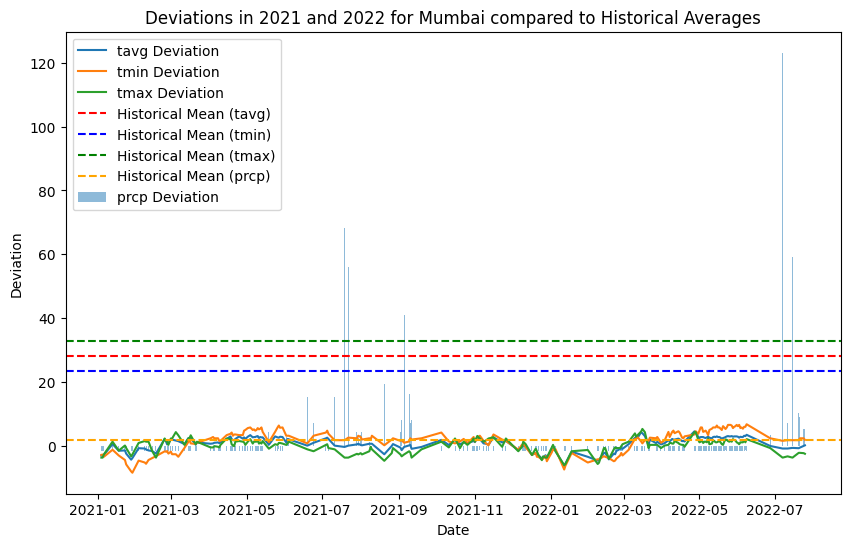

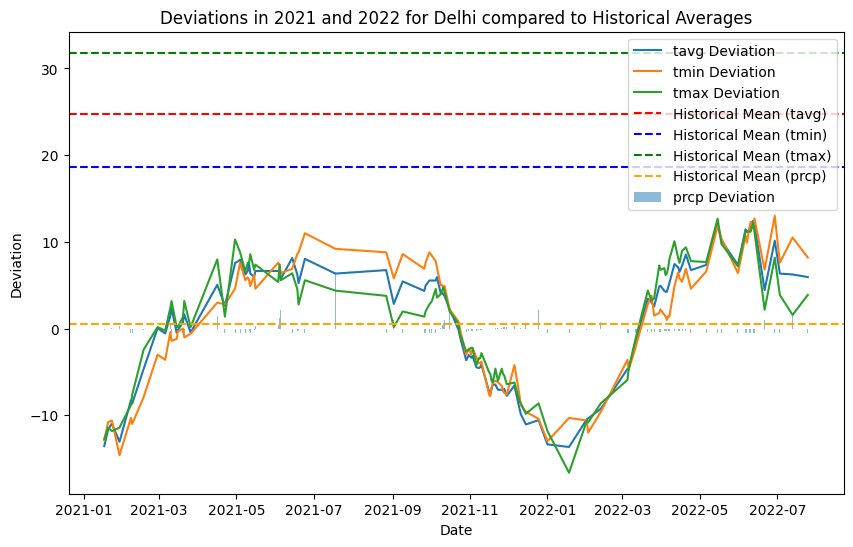

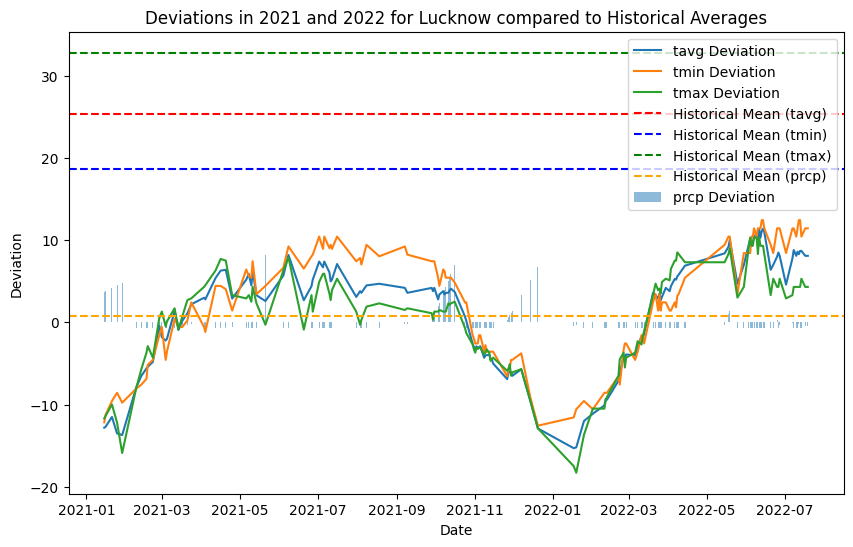

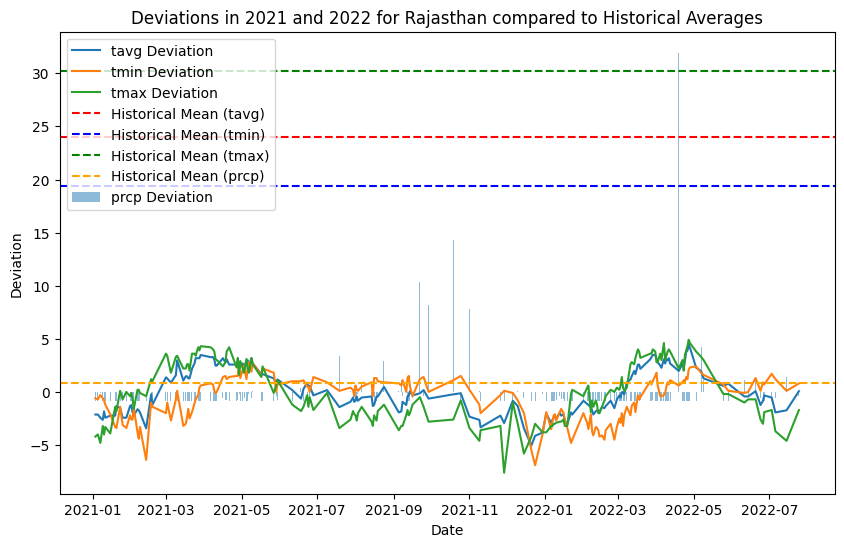

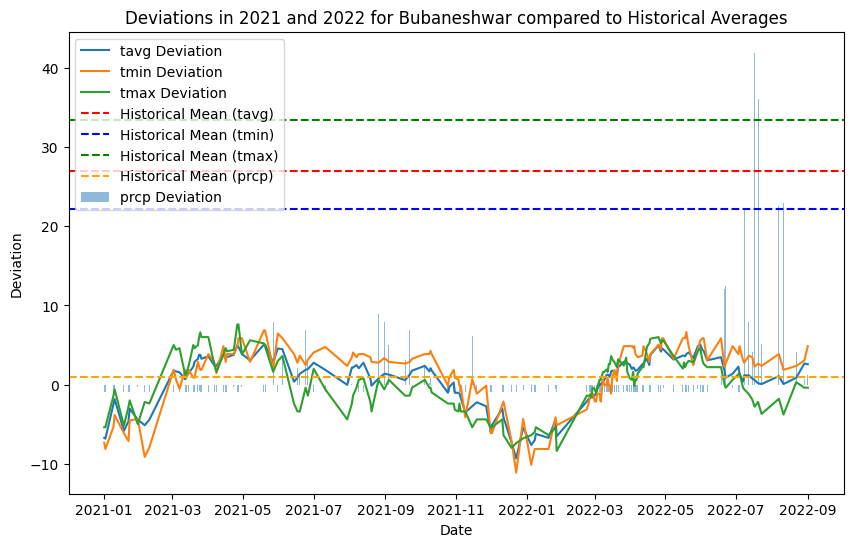

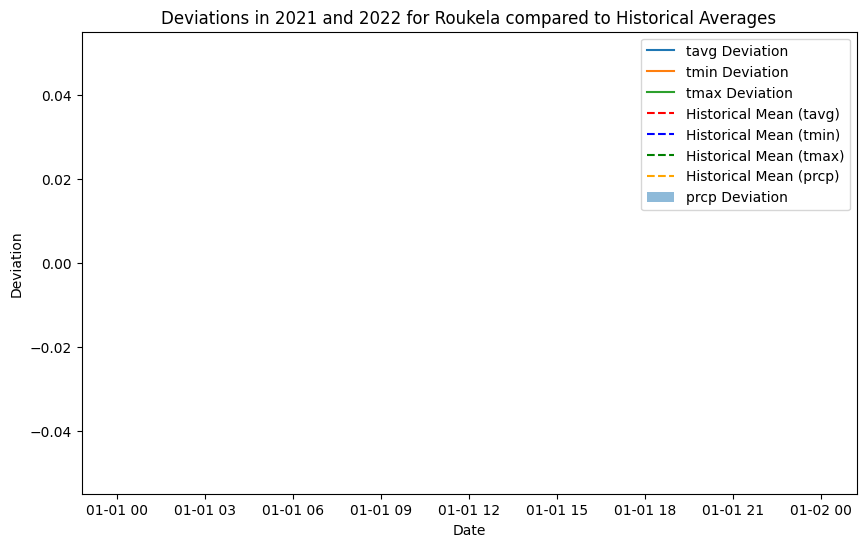

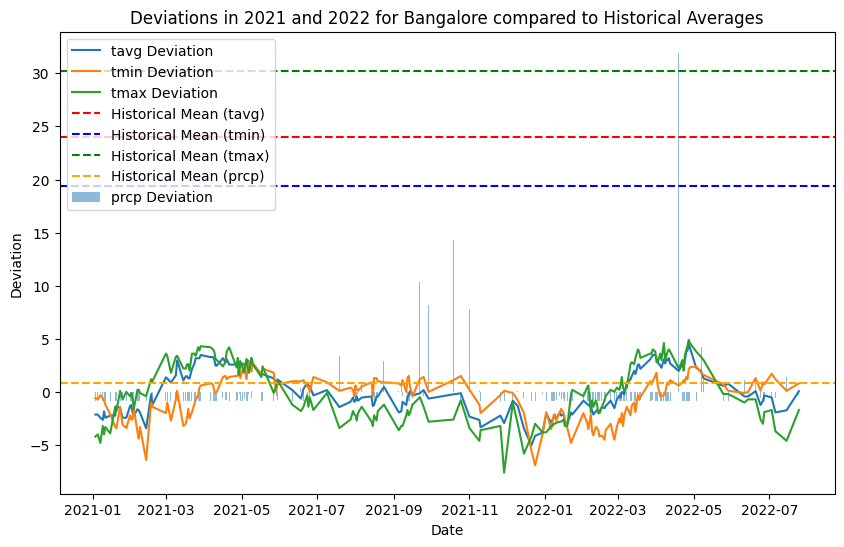

In [180]:

# Filter data for the years 2021 and 2022
recent_years_data = cities[(cities['year'] == 2021) | (cities['year'] == 2022)]

# Aggregate data for each city and time combination
agg_data = cities[cities['year'] < 2021].groupby(['City', 'year']).agg({'tavg': 'mean', 'tmin': 'mean', 'tmax': 'mean', 'prcp': 'mean'}).reset_index()

# Calculate historical averages (excluding 2021 and 2022)
historical_averages = agg_data.groupby(['City']).agg({'tavg': 'mean', 'tmin': 'mean', 'tmax': 'mean', 'prcp': 'mean'}).reset_index()

# Merge historical averages with recent years' data
merged_data = pd.merge(recent_years_data, historical_averages, how='left', on=['City'], suffixes=('_recent', '_historical'))

# Calculate deviations for each variable
for variable in ['tavg', 'tmin', 'tmax', 'prcp']:
    merged_data[f'{variable}_deviation'] = merged_data[f'{variable}_recent'] - merged_data[f'{variable}_historical']

# Plot deviations for each city and variable along with historical mean
cities_list = merged_data['City'].unique()

for city in cities_list:
    city_data = merged_data[merged_data['City'] == city]

    plt.figure(figsize=(10, 6))
    plt.plot(city_data['time'], city_data['tavg_deviation'], label='tavg Deviation')
    plt.plot(city_data['time'], city_data['tmin_deviation'], label='tmin Deviation')
    plt.plot(city_data['time'], city_data['tmax_deviation'], label='tmax Deviation')
    plt.bar(city_data['time'], city_data['prcp_deviation'], label='prcp Deviation', alpha=0.5)

    plt.axhline(y=city_data['tavg_historical'].iloc[0], color='red', linestyle='--', label='Historical Mean (tavg)')
    plt.axhline(y=city_data['tmin_historical'].iloc[0], color='blue', linestyle='--', label='Historical Mean (tmin)')
    plt.axhline(y=city_data['tmax_historical'].iloc[0], color='green', linestyle='--', label='Historical Mean (tmax)')
    plt.axhline(y=city_data['prcp_historical'].iloc[0], color='orange', linestyle='--', label='Historical Mean (prcp)')

    plt.xlabel('Date')
    plt.ylabel('Deviation')
    plt.title(f'Deviations in 2021 and 2022 for {city} compared to Historical Averages')
    plt.legend()
    plt.show()


EDA

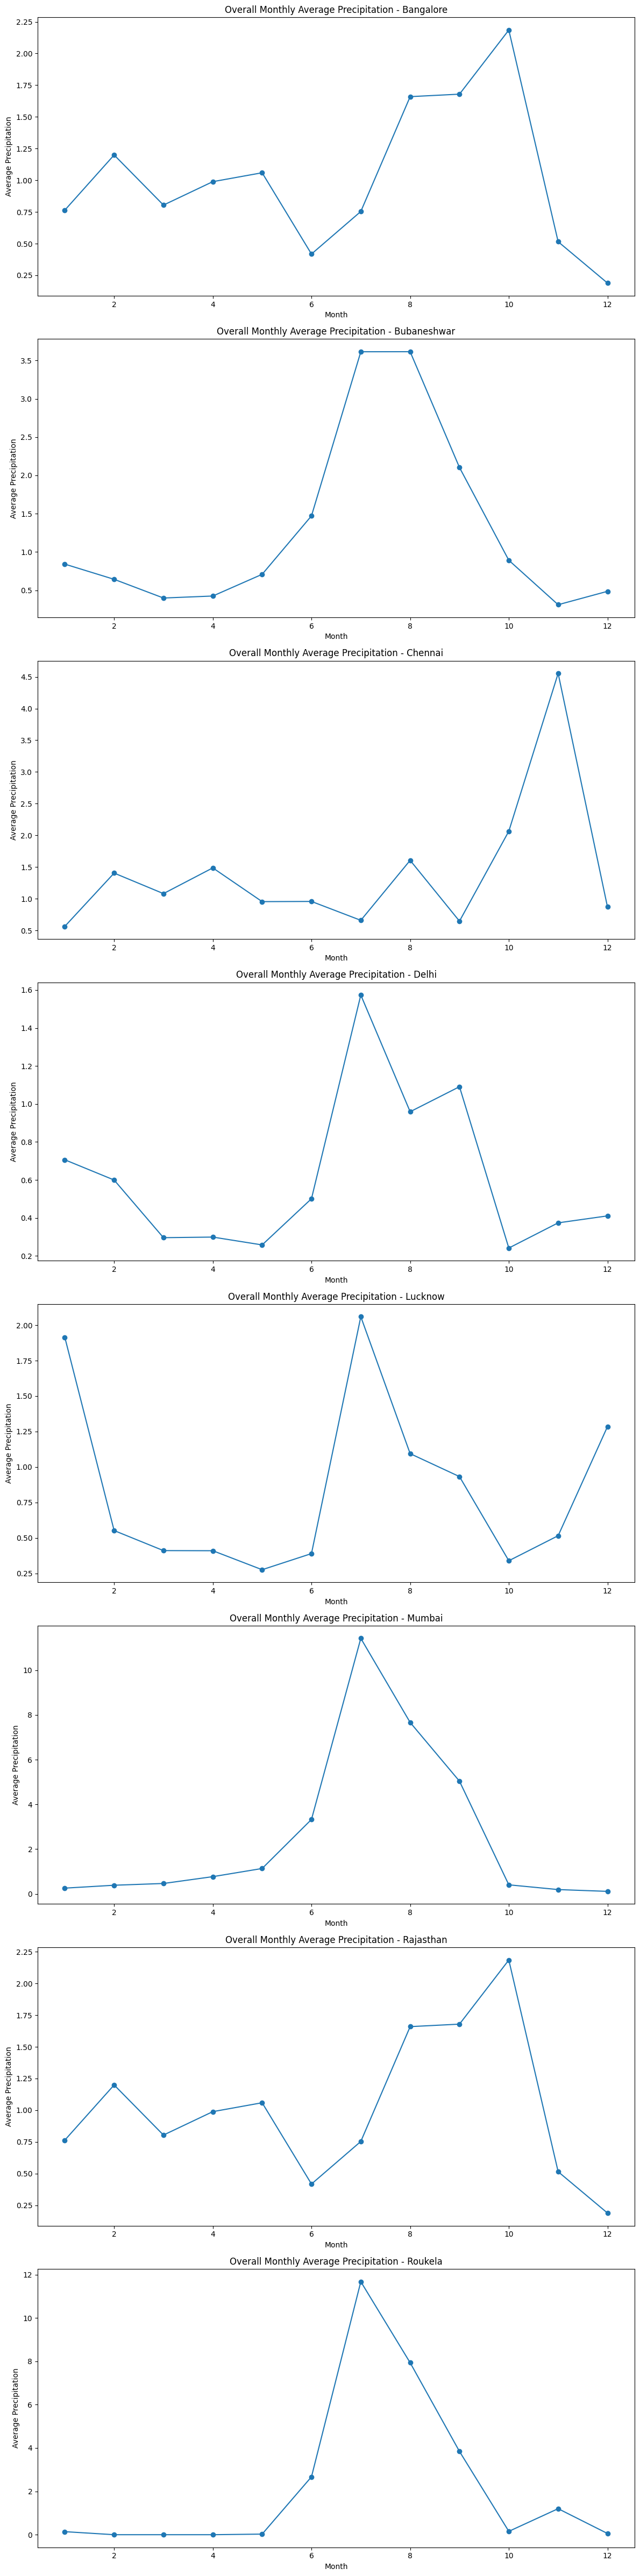

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'time' column to datetime format
cities['time'] = pd.to_datetime(cities['time'], format='%Y-%m-%d')

# Extract month and year from the 'time' column
cities['month'] = cities['time'].dt.month
cities['year'] = cities['time'].dt.year

# Calculate the average precipitation for each month across all years for all cities
monthly_avg_prcp_all_cities = cities.groupby(['City', 'month', 'year'])['prcp'].mean().reset_index()

# Calculate the overall average precipitation for each month for all cities
overall_monthly_avg_prcp_all_cities = monthly_avg_prcp_all_cities.groupby(['City', 'month'])['prcp'].mean().reset_index()

# Plot the overall average precipitation for each city one below the other
cities_list = overall_monthly_avg_prcp_all_cities['City'].unique()
num_cities = len(cities_list)

plt.figure(figsize=(12, 6 * num_cities))

for i, city in enumerate(cities_list, 1):
    plt.subplot(num_cities, 1, i)
    city_data = overall_monthly_avg_prcp_all_cities[overall_monthly_avg_prcp_all_cities['City'] == city]
    plt.plot(city_data['month'], city_data['prcp'], marker='o')
    plt.title(f'Overall Monthly Average Precipitation - {city}')
    plt.xlabel('Month')
    plt.ylabel('Average Precipitation')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [182]:
mumbai_data_cleaned

,time,tavg,tmin,tmax,prcp,City
0,1990-01-01,23.2,17.0,NaN,0.0,Mumbai
1,1990-01-02,22.2,16.5,29.9,0.0,Mumbai
2,1990-01-03,21.8,16.3,30.7,0.0,Mumbai
3,1990-01-04,25.4,17.9,31.8,0.0,Mumbai
6,1990-01-07,26.0,18.9,33.7,0.0,Mumbai
...,...,...,...,...,...,...
11883,2022-07-15,27.5,25.0,29.0,61.0,Mumbai
11888,2022-07-20,27.4,25.0,30.5,11.9,Mumbai
11889,2022-07-21,27.6,25.6,30.5,10.9,Mumbai
11892,2022-07-24,28.1,25.6,30.4,7.1,Mumbai


In [183]:
mumbai_data_cleaned

,time,tavg,tmin,tmax,prcp,City
0,1990-01-01,23.2,17.0,NaN,0.0,Mumbai
1,1990-01-02,22.2,16.5,29.9,0.0,Mumbai
2,1990-01-03,21.8,16.3,30.7,0.0,Mumbai
3,1990-01-04,25.4,17.9,31.8,0.0,Mumbai
6,1990-01-07,26.0,18.9,33.7,0.0,Mumbai
...,...,...,...,...,...,...
11883,2022-07-15,27.5,25.0,29.0,61.0,Mumbai
11888,2022-07-20,27.4,25.0,30.5,11.9,Mumbai
11889,2022-07-21,27.6,25.6,30.5,10.9,Mumbai
11892,2022-07-24,28.1,25.6,30.4,7.1,Mumbai


Q3)Build a model to predict the rainfall for Santacruz for the year 2023 and
compare it with actual values.

In [185]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Assuming your santacruz.csv has columns 'time' and 'prcp', and 'time' is in datetime format
santacruz_data = pd.read_csv("santacruz_2023.csv", parse_dates=['date'])

# Set 'time' as the index for both DataFrames
mumbai_data_cleaned.set_index('time', inplace=True)
santacruz_data.set_index('date', inplace=True)

# Filter data for the last 10 years (2013-2022)
last_10_years_data = mumbai_data_cleaned['2013-07-01':'2022-07-01']





In [186]:

# Train-Test Split: Use data up to 2022 for training and 2023 for testing
train_data = last_10_years_data[last_10_years_data.index.year < 2023]
test_data_actual = santacruz_data[santacruz_data.index.year == 2023]

In [193]:
# Build SARIMA model
sarima_model = SARIMAX(train_data['prcp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()



In [198]:
# Predict using the SARIMA model with a longer forecast horizon
forecast_horizon = len(test_data_actual)  # Adjust as needed
predicted_values = sarima_results.get_forecast(steps=forecast_horizon)
predicted_mean = predicted_values.predicted_mean
confidence_interval = predicted_values.conf_int()


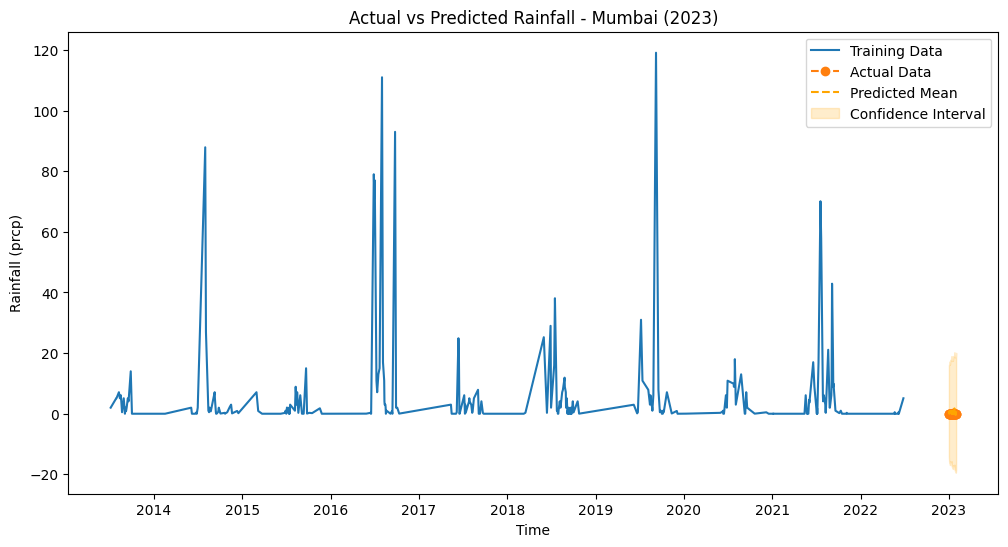

In [199]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['prcp'], label='Training Data')
plt.plot(test_data_actual.index, test_data_actual['prcp'], label='Actual Data', linestyle='--', marker='o')
plt.plot(test_data_actual.index, predicted_mean, label='Predicted Mean', linestyle='--', color='orange')
plt.fill_between(test_data_actual.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='orange', alpha=0.2, label='Confidence Interval')
plt.title('Actual vs Predicted Rainfall - Mumbai (2023)')
plt.xlabel('Time')
plt.ylabel('Rainfall (prcp)')
plt.legend()
plt.show()

In [200]:
# Evaluate the model
mae = mean_absolute_error(test_data_actual['prcp'], predicted_mean)
rmse = mean_squared_error(test_data_actual['prcp'], predicted_mean, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.5457404186072462
Root Mean Squared Error: 0.6985028836933792


Q 4) Based on the historical data, can you predict the rainfall for 2024 for a
particular region.

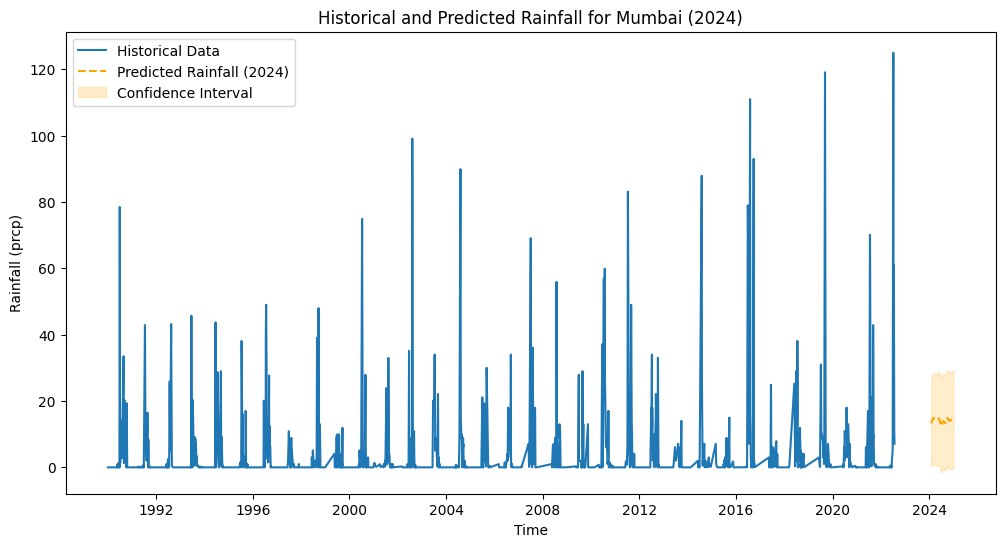

In [204]:

# Fit SARIMA model using the entire available data
sarima_model = SARIMAX(mumbai_data_cleaned['prcp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()

# Forecast rainfall for 2024
forecast_2024 = sarima_results.get_forecast(steps=12)  # Assuming monthly predictions for the year 2024
forecast_index_2024 = pd.date_range(start='2024-01-01', periods=12, freq='M')

# Plotting historical data and predicted values
plt.figure(figsize=(12, 6))
plt.plot(mumbai_data_cleaned.index, mumbai_data_cleaned['prcp'], label='Historical Data')
plt.plot(forecast_index_2024, forecast_2024.predicted_mean, color='orange', linestyle='--', label='Predicted Rainfall (2024)')
plt.fill_between(forecast_index_2024, forecast_2024.conf_int().iloc[:, 0], forecast_2024.conf_int().iloc[:, 1], color='orange', alpha=0.2, label='Confidence Interval')
plt.title('Historical and Predicted Rainfall for Mumbai (2024)')
plt.xlabel('Time')
plt.ylabel('Rainfall (prcp)')
plt.legend()
plt.show()